In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

In [4]:
# 가우스 노이즈를 더하는 함수
def gaussian_noise(x, scale=0.8):
    # 가우스 노이즈를 더해줌
    gaussian_data_x = x + np.random.normal(
        loc=0,
        scale=scale,
        size=x.shape
    )

    # 이미지의 픽셀값을 0과 1 사이로 정규화
    gaussian_data_x = np.clip(gaussian_data_x, 0, 1)

    gaussian_data_x = torch.tensor(gaussian_data_x)
    gaussian_data_x = gaussian_data_x.type(torch.FloatTensor)

    return gaussian_data_x

/tmp/ipykernel_533609/177772013.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gaussian_data_x = torch.tensor(gaussian_data_x)


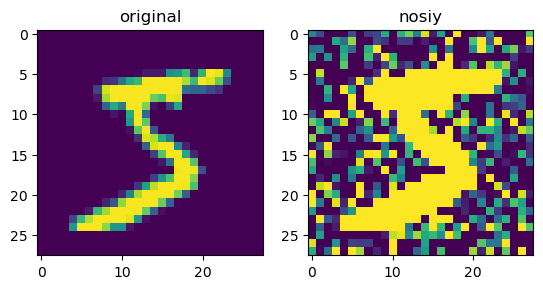

In [5]:
# 학습용 데이터 정의
traning_data = MNIST(
    root="./",
    train=True,
    download=True,
    transform=ToTensor()
)

# 평가용 데이터 정의
test_data = MNIST(
    root = "./",
    train=False,
    download=True,
    transform=ToTensor()
)

# 첫 번째 원본 이미지
img = traning_data.data[0]
# 노이즈가 섞인 이미지로 변환
img_gaussian = gaussian_noise(img)

# 두 이미지 출력
plt.subplot(1, 2, 1)
plt.title("original")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("nosiy")
plt.imshow(img_gaussian)

In [ ]:
from torch.utils.data.dataset import Dataset

class Denoising(Dataset):
    def __init__(self):
        # 원본 이미지를 담고 있는 MINST 데이터
        self.mnist = MNIST(
            root="./",
            train=True,
            download=True,
            transform=ToTensor()
        )

        self.data = []
        # 노이즈 입히기
        for i in range(len(self.mnist)):
            noisy_input = gaussian_noise(self.mnist.data[1])
            input_tensor = torch.tensor(noisy_input)
            self.data.append(torch.unsqueeze(input_tensor, dim=0))

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, i):
        data = self.data[i]

        # 원본 이미지도 0과 1사이로 값을 맞춰줌 (최대-최소 정규화 적용)
        label = self.mnist.data[i]/255

        return data, label
